# What is corner?
- A corner is a point whose local neighborhood stands in two dominant and different edge direcctions.
- A corner can be interpreted as the junction of two edges, where an edge is a sudden change in image brightness.

### Algorithms
1. Harris Corner Direction
2. Shi-Tomas Corner Dection

# Harris Corner Direction

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

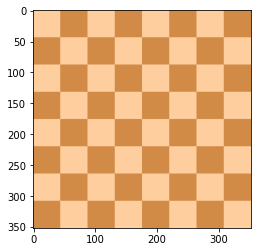

In [4]:
plt.imshow(flat_chess)

In [5]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

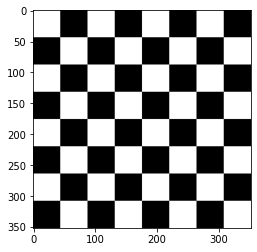

In [6]:
plt.imshow(gray_flat_chess, cmap="gray")

In [8]:
real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

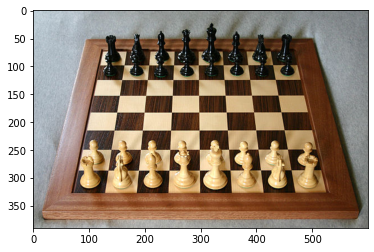

In [9]:
plt.imshow(real_chess)

In [10]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

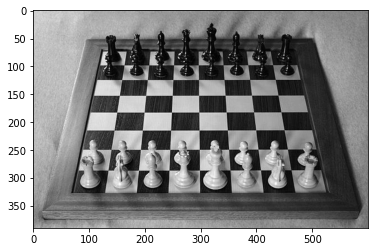

In [12]:
plt.imshow(gray_real_chess, cmap="gray")

In [14]:
gray = np.float32(gray_flat_chess)

In [15]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [16]:
dst = cv2.dilate(dst, None)

In [18]:
flat_chess[dst>0.01*dst.max()] = [255, 0, 0] #RGB

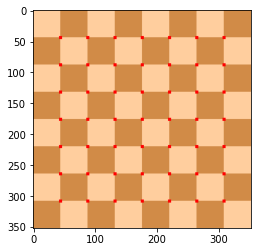

In [19]:
plt.imshow(flat_chess)

In [20]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [21]:
dst = cv2.dilate(dst, None)

In [22]:
real_chess[dst>0.01*dst.max()] = [255, 0, 0]

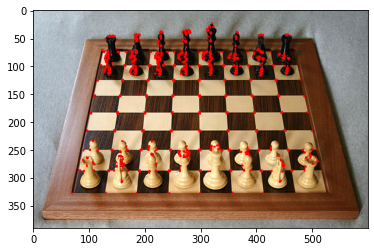

In [23]:
plt.imshow(real_chess)

# Shi-Tomasi Detection

In [47]:
real_chess = cv2.imread('real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

In [48]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)

In [49]:
corners = np.int0(corners)

In [50]:
for i in corners:
  x,y = i.ravel()
  cv2.circle(flat_chess, (x,y),3, (255, 0,0), -1)

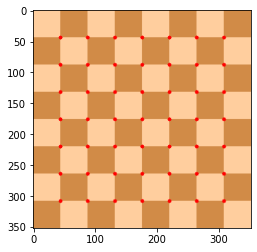

In [51]:
plt.imshow(flat_chess)

In [52]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 80, 0.01, 10)

In [53]:
corners = np.int0(corners)

In [54]:
for i in corners:
  x,y = i.ravel()
  cv2.circle(real_chess, (x,y),3, (255, 0,0), -1)

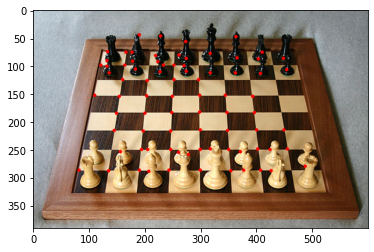

In [56]:
plt.imshow(real_chess)